# Assignment 1 - Part B.1: working with real data

In this assignment you will import and explore/analyze a dataset for classification. You will explore which ML algorithms are best to classify this and you will present your best solution. For this assignment we will use Human Activity dataset:

### Description of the dataset:

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/XOEN9W05_4A/0.jpg)](https://www.youtube.com/watch?v=XOEN9W05_4A)

https://youtu.be/XOEN9W05_4A


The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters. From the procecced input sensors a 561-feature vector with time and frequency domain variables is generated.
For more details see: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

> NOTE: we have downloaded this dataset already for you and placed it on the github as HAR.zip

### Steps

In this assignment you will analyze the data, train and evaluate a model based on this dataset. 

These are the generic steps to be taken
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.
9. Additional Questions



----

In the Notebook this structure is used for dividing the different steps, so make sure you do the implementation and analisis at these location in the notebook. 

You may add additinal code blocks, but keep the seperation of the given structure.

At the end of each block summarize / comment / conclude your current step in the given textblocks.

At the end you have to hand in this notebook together with the notebooks of Assignment 1, when you hand it in you should make sure that you saved it with all output visible. So we can evaluate your notebooks output without directly ruinning it.
In addition (to be sure) you should also save a pdf of the final result.

----

### Hints

The needed dataset is available in our github repository (HAR.zip), how to download this from your notebook and addition hints are available in the Tips & Tricks file

```
# INSERT YOUR NAMES 
```


# 1. Frame the problem and look at the big picture
Describe the problem at hand and explain your approach

```
# Place your comments / conclusions / insight here
```


# 2. Get the data.

Initialize the system, get all needed libraries, retreive the data and import it

> NOTE: You can download the dataset directly from github, see Tips & Tricks

In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [86]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [87]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


```
# Place your comments / conclusions / insight here
```


# 3. Explore the data to gain insights.

Explore the data in any possible way, visualize the results (if you have multiple plots of the same kind of data put them in one larger plot)

> NOTE:You can visualize high-dimensional data in 2-d using T-distributed Stochastic Neighbor Embedding, see Tips & Tricks. (You can also visualze it in 3D, as described in the tutorial)



In [88]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [89]:
test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [90]:
train.shape

(7352, 563)

In [91]:
test.shape

(2947, 563)

In [92]:
train.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [93]:
test.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [94]:

plt.figure(figsize=(5, 5))
label1 = train['Activity'].value_counts()
label2 = test['Activity'].value_counts()

graph1 = go.Bar(name="Training set", x=label1.index, y=label1.values)
graph2 = go.Bar(name="Testing set",x=label2.index, y=label2.values)

layout = go.Layout(height=500, width=1100, title = 'Activity (Train & Test Set)',
                   xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
                   yaxis = dict(title = 'Amount', showgrid=False),
                   plot_bgcolor='#ffffff', paper_bgcolor='#ffffff',
                   title_font=dict(size=25, color='#a5a7ab', family='verdana'),
                   margin=dict(t=80, b=30, l=70, r=40),
                   font=dict(color='#8c8f63'))

figure = go.Figure(data=[graph1,graph2], layout=layout,)
figure.update_traces(textfont=dict(color='#f0f'),marker=dict(line=dict(color='#ffffff', width=1)))
figure.update_layout(xaxis=dict(autorange="reversed"), 
                    barmode='stack', 
                    xaxis_tickangle=-45)

iplot(figure)

<Figure size 500x500 with 0 Axes>

In [95]:
label_counts_for_train = train['Activity'].value_counts()
colors = px.colors.qualitative.Plotly

label_counts_for_test = test['Activity'].value_counts()


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(hole=0.5, labels=label_counts_for_train.index, values=label_counts_for_train.values, name="Train Set"), 1, 1)
fig.add_trace(go.Pie(hole=0.5, labels=label_counts_for_test.index, values=label_counts_for_test.values, name="Test Set"), 1, 2)

fig.update_layout(
    height=450, width=700,
    title = 'Activity Counts Distribution For Train & Test Set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#ffffff', paper_bgcolor='#ffffff',
    title_font=dict(size=25, color='#a5a7ab', family='verdana'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8c8f63'))
# graph = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))
fig.show()

c:\Users\yanni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\yanni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 0.465s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125526
[t-SNE] KL divergence after 1000 iterations: 1.280823


<AxesSubplot: >

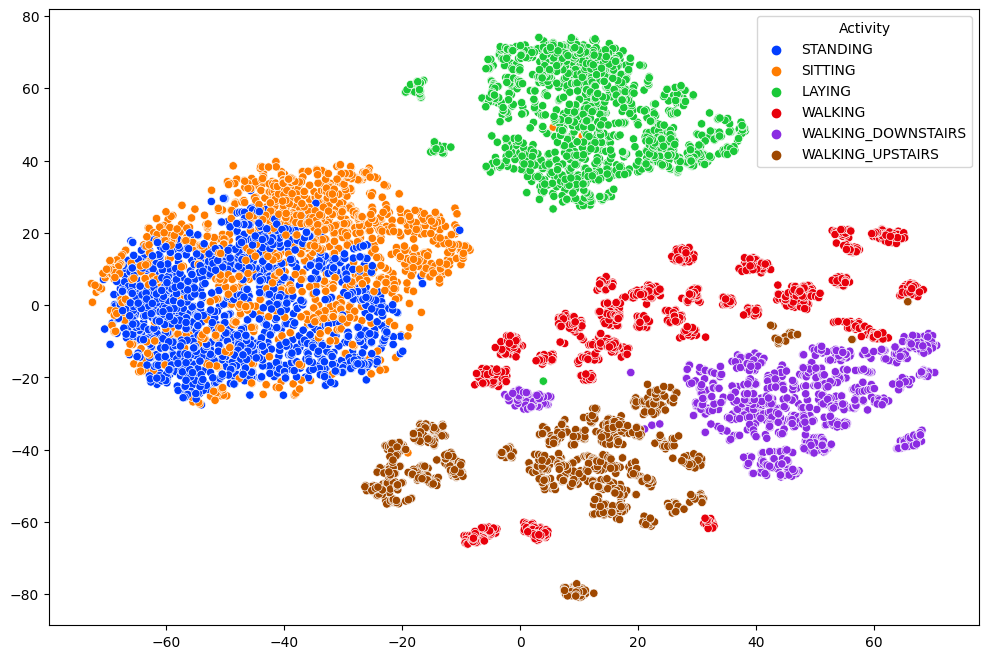

In [96]:
# t-sne (2D)
x_for_tsne = train.drop(['subject', 'Activity'], axis=1)

tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(x_for_tsne)
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["Activity"],palette="bright")

# 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

prepare your data, is it normalized? are there outlier? Make a training and a test set.


In [97]:
fig = go.Figure()
fig.add_trace(go.Box(y=train['subject'], name="Train Set", notched=True))
fig.add_trace(go.Box(y=test['subject'], name="Test Set", notched=True))

fig.update_xaxes(showgrid=False)
fig.update_layout(
    height=450, width=700,
    title = 'Activity count distribution Train & Test set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#ffffff', paper_bgcolor='#ffffff',
    title_font=dict(size=25, color='#a5a7ab', family='verdana'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8c8f63'))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(boxpoints='all', jitter=0)

In [98]:
X= train.drop(['Activity','subject'],axis=1)
y= train.Activity.values.astype(object)

X.shape , y.shape

((7352, 561), (7352,))

In [99]:
encoder=preprocessing.LabelEncoder()

In [100]:
encoder.fit(y)
y=encoder.transform(y)
y.shape

(7352,)

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler=StandardScaler()

In [103]:
X=scaler.fit_transform(X)

In [104]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((5881, 561), (1471, 561), (5881,), (1471,))

```
# Place your comments / conclusions / insight here
```


# 5. Explore many different models and short-list the best ones.

Explore / train and list the top 3 algorithms that score best on this dataset.

### SVC Classification

In [105]:
svc=SVC()

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

accSVC = accuracy_score(y_test, y_pred)*100


print(f"SVC Model has an accuracy score of {accSVC} %")



SVC Model has an accuracy score of 97.48470428280082 %


In [106]:
svcConf = confusion_matrix(y_test, y_pred)
fig = px.imshow(svcConf, text_auto=True)
fig.show()


### Random Forest Classification

In [107]:
rand_clf=RandomForestClassifier()

rand_clf.fit(X_train,y_train)

y_pred=rand_clf.predict(X_test)

accRandomForest = accuracy_score(y_test,y_pred)*100

# compute and print accuracy score
print(f"Random Forest Classifier has an accuracy score of: {accRandomForest} %")


Random Forest Classifier has an accuracy score of: 97.96057104010877 %


In [108]:
z = confusion_matrix(y_test, y_pred)

fig = px.imshow(z, text_auto=True)
fig.show()

### KNN Classification

In [109]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
accKNN = accuracy_score(y_test, y_pred)*100

print(f"KNN Model has an accuracy score of {accKNN}")

KNN Model has an accuracy score of 96.05710401087696


In [110]:
knnConf = confusion_matrix(y_test, y_pred)

fig = px.imshow(knnConf, text_auto=True)
fig.show()

```
# Place your comments / conclusions / insight here
```


# 6. Fine-tune your models and combine them into a great solution.

can you get better performance within a model? e.g if you use a KNN classifier how does it behave if you change K (k=3 vs k=5 vs k=?). Which parameters are here to tune in the chosen models? 

In [120]:
svc=SVC(kernel='rbf', C=23)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
accSVCfinetuned = accuracy_score(y_test,y_pred)*100

# compute and print accuracy score
print(f"SVC Model has an accuracy score of {accSVCfinetuned} %")



SVC Model has an accuracy score of 98.84432358939496 %


In [121]:
svcConf = confusion_matrix(y_test, y_pred)
fig = px.imshow(svcConf, text_auto=True)
fig.show()


In [117]:
rand_clf=RandomForestClassifier(random_state=5)

rand_clf.fit(X_train,y_train)

y_pred=rand_clf.predict(X_test)

accRandomForestfinetuned = accuracy_score(y_test,y_pred)*100

# compute and print accuracy score
print(f"Finetuned Random Forest Classifier has an accuracy of: {accRandomForestfinetuned} %")


Finetuned Random Forest Classifier has an accuracy of: 98.16451393609789 %


In [118]:
z = confusion_matrix(y_test, y_pred)

fig = px.imshow(z, text_auto=True)
fig.show()

In [119]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)

accKNNfinetuned = accuracy_score(y_test, y_pred)*100

print('Finetuned KNN Model accuracy score is {0:0.4f} %'. format(accKNNfinetuned))

Finetuned KNN Model accuracy score is 96.3290 %


In [116]:
knnConf = confusion_matrix(y_test, y_pred)

fig = px.imshow(knnConf, text_auto=True)
fig.show()

```
# Place your comments / conclusions / insight here
```


# 7. Present your solution.

Explain why you would choose for a specific model



In [ ]:
import plotly.express as px

dataset = 


```
# Place your comments / conclusions / insight here
```


# 8. Launch, monitor, and maintain your system.

Deployment we will do in the next assignment!

# 9. Additional Questions


* Explain which classes should be easy / challenging to classify based on your  2/3D plots the data? 

* Explain what specifics you did to this dataset for preparing your data? 

* Explain why you think that your chosen algorithm outperforms the rest? 


```
# Place your comments / conclusions / insight here
```
